In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

from sklearn import decomposition
from sklearn import preprocessing
from sklearn import metrics  

%matplotlib inline
plt.style.use('seaborn-white')

In [41]:
os.getcwd()
os.chdir('C://Users/Michael Hong/Desktop/VIVA/datasheet')

In [42]:
data = pd.read_csv('배후지.csv',engine ='python')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 64 columns):
상권_코드              18398 non-null int64
서비스_업종_코드_명        18398 non-null object
평균_영업_개월_수         18398 non-null float64
당월_매출_금액           18398 non-null int64
월요일_매출_금액          18398 non-null int64
화요일_매출_금액          18398 non-null int64
수요일_매출_금액          18398 non-null int64
목요일_매출_금액          18398 non-null int64
금요일_매출_금액          18398 non-null int64
토요일_매출_금액          18398 non-null int64
일요일_매출_금액          18398 non-null int64
시간대_00~06_매출_금액    18398 non-null int64
시간대_06~11_매출_금액    18398 non-null int64
시간대_11~14_매출_금액    18398 non-null int64
시간대_14~17_매출_금액    18398 non-null int64
시간대_17~21_매출_금액    18398 non-null int64
시간대_21~24_매출_금액    18398 non-null int64
남성_매출_금액           18398 non-null int64
여성_매출_금액           18398 non-null int64
연령대_10_매출_금액       18398 non-null int64
연령대_20_매출_금액       18398 non-null int64
연령대_30_매출_금액       18398 non-null int64
연령대_40_매

,상권_코드,서비스_업종_코드_명,평균_영업_개월_수,당월_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,...,총_상주인구_수,청년층_유동인구_수.1,청년층_상주인구_수,중년층_상주인구_수,장년층_상주인구_수,총_직장인구_수,청소년층_직장인구_수,청년층_직장인구_수,중년층_직장인구_수,장년층_직장인구_수
0,1744,편의점,62.431818,1405271083,222010412,177766111,182535315,179214043,192084018,211213051,...,38897,5817,13275,12100,7705,169,1,73,84,11
1,1744,호프간이주점,34.951282,785530821,91628787,91376796,90621493,106459912,114839003,147543382,...,38897,5817,13275,12100,7705,169,1,73,84,11
2,1744,커피음료,22.636986,667956174,80405449,71331617,81477376,72728701,93825614,137108626,...,38897,5817,13275,12100,7705,169,1,73,84,11
3,1744,제과점,41.309524,472753407,50135194,53750854,60241920,59212064,68380650,86315597,...,38897,5817,13275,12100,7705,169,1,73,84,11
4,1744,치킨집,67.227273,358430949,47632332,36185141,39599027,40735067,58703271,65655860,...,38897,5817,13275,12100,7705,169,1,73,84,11


In [43]:
data.var()

상권_코드              2.545141e+05
평균_영업_개월_수         1.304061e+03
당월_매출_금액           2.437227e+18
월요일_매출_금액          5.779993e+16
화요일_매출_금액          4.102473e+16
수요일_매출_금액          4.408291e+16
목요일_매출_금액          4.579298e+16
금요일_매출_금액          5.595390e+16
토요일_매출_금액          6.313385e+16
일요일_매출_금액          5.779583e+16
시간대_00~06_매출_금액    2.273856e+16
시간대_06~11_매출_금액    1.040946e+16
시간대_11~14_매출_금액    1.540136e+17
시간대_14~17_매출_금액    3.836261e+16
시간대_17~21_매출_금액    3.228727e+17
시간대_21~24_매출_금액    1.124400e+17
남성_매출_금액           5.012926e+17
여성_매출_금액           2.706427e+17
연령대_10_매출_금액       1.016669e+15
연령대_20_매출_금액       1.679320e+17
연령대_30_매출_금액       9.415446e+16
연령대_40_매출_금액       5.520652e+16
연령대_50_매출_금액       3.952393e+16
연령대_60_이상_매출_금액    2.146560e+16
점포수                3.840241e+03
집객시설_수             6.259326e+03
관공서_수              9.254329e+00
은행_수               1.815314e+01
종합병원_수             9.473147e-01
일반_병원_수            1.954271e+00
                       ...     
초등학교_수  

In [44]:
data.drop(labels='상권_코드_명',axis=1,inplace=True)

In [45]:
le = preprocessing.LabelEncoder()

data['서비스_업종_코드_명'] = le.fit_transform(data['서비스_업종_코드_명'])
#LabelEncoder(columns = ['서비스_업종_코드_명']).fit_transform(data)

In [46]:
data['서비스_업종_코드_명'].head()

0     8
1    10
2     6
3     3
4     5
Name: 서비스_업종_코드_명, dtype: int32

In [57]:
data_standardized = preprocessing.scale(data, axis=0)  # standardization 

# Instantiate PCA estimator 
pca = decomposition.PCA(n_components = 10)
# fit : PCA 실행 
data_PC = pca.fit(data_standardized)

D:\Program\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
D:\Program\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [58]:
vars(data_PC)

{'n_components': 10,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'random_state': None,
 '_fit_svd_solver': 'randomized',
 'mean_': array([ 1.97737733e-16,  2.49585957e-17,  6.95171717e-18, -2.31723906e-17,
        -2.47172166e-17, -3.24413468e-17,  0.00000000e+00,  1.08137823e-17,
        -7.72413019e-18, -1.69930864e-17,  4.32551290e-17,  1.69930864e-17,
         3.08965207e-18,  2.16275645e-17, -4.63447811e-17,  3.55309989e-17,
         4.63447811e-18, -3.86206509e-17, -3.39861728e-17,  3.32137598e-17,
         1.23586083e-17, -6.33378675e-17,  1.85379124e-17, -1.85379124e-17,
        -3.24413468e-17,  2.31723906e-17, -7.41516498e-17, -6.79723456e-17,
        -6.17930415e-17, -1.39034343e-17,  3.55309989e-17, -8.14895735e-17,
         1.85379124e-17, -3.08965207e-18, -2.47172166e-17, -6.79723456e-17,
        -4.01654770e-17,  1.39034343e-17,  6.17930415e-17, -2.78068687e-17,
         0.00000000e+00,  6.48826936e-17,  2.47172166e-17

In [59]:
data_PC.components_   # PC들을 column별 배치하려면 Transpose 해 주어야...

array([[ 7.88475235e-03,  6.41313385e-02, -3.29885321e-02,
         2.15345581e-01,  2.11354134e-01,  2.11266459e-01,
         2.11924633e-01,  2.11601253e-01,  2.13951430e-01,
         2.08713528e-01,  2.06969152e-01,  1.47703721e-01,
         1.24300965e-01,  1.92979427e-01,  1.97156291e-01,
         2.10041973e-01,  2.01404477e-01,  2.14009565e-01,
         2.11104426e-01,  1.57465530e-01,  1.88199777e-01,
         2.09047605e-01,  2.08997362e-01,  1.98791440e-01,
         1.80395333e-01,  1.95426227e-01,  9.57401453e-02,
         5.77666213e-02,  9.01873256e-02,  1.90461122e-02,
         2.49007725e-02,  6.32760167e-02,  3.66402991e-03,
         1.23003542e-02, -1.60433703e-03,  1.74751498e-03,
         1.31140856e-02,  2.96218232e-02,  1.73851934e-02,
         4.44461668e-02,  8.12941091e-02,  5.14088197e-02,
         5.80967218e-02,  2.94295858e-02,  5.20383204e-02,
         4.61967285e-02, -1.57658176e-02,  3.44319776e-02,
         9.55547152e-02,  5.66598084e-02,  1.00064872e-0

In [60]:
data_PC.components_.shape

(10, 63)

Text(0, 0.5, 'Z3')

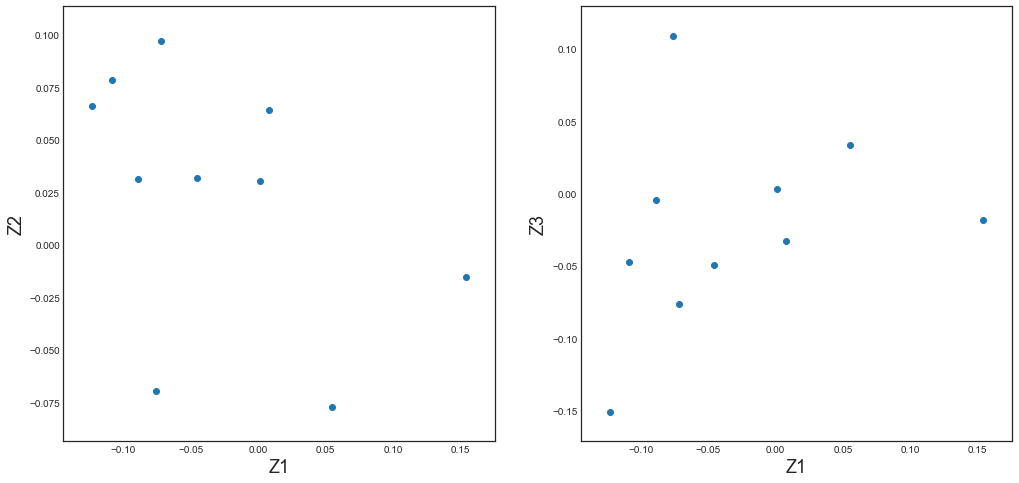

In [61]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17, 8))

Z1 = data_PC.components_[:, 0]    # 첫번째 Principal component score 
Z2 = data_PC.components_[:, 1]    # 두번째 Principal component score
Z3 = data_PC.components_[:, 2]    # 세번째 Principal component score

# print(list(le.fit_transform(nci_labs.x)))
# list(enumerate(le.classes_))
le = preprocessing.LabelEncoder()
ax1.scatter(Z1, Z2)     
ax1.set_xlabel('Z1', size=18)
ax1.set_ylabel('Z2', size=18)

ax2.scatter(Z1, Z3) 
ax2.set_xlabel('Z1', size=18)
ax2.set_ylabel('Z3', size=18)

In [62]:
PCs = pd.DataFrame(data_PC.components_.T, index=data.columns)
print("Index of max weight feature of PC1:%s, with weight= %s" % (PCs.iloc[:,0].argmax(), PCs.iloc[:,0].max() ))

PCs                 # scikit-learn으로 구한 PC loading 들

Index of max weight feature of PC1:당월_매출_금액, with weight= 0.21534558134435472


D:\Program\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


,0,1,2,3,4,5,6,7,8,9
상권_코드,0.007885,0.001356,0.054883,-0.088896,-0.045612,-0.071899,-0.076167,-0.108514,-0.123030,0.154024
서비스_업종_코드_명,0.064131,0.030526,-0.077271,0.031331,0.032104,0.097349,-0.069569,0.078646,0.066166,-0.015093
평균_영업_개월_수,-0.032989,0.003372,0.033776,-0.004565,-0.049131,-0.075853,0.108865,-0.046969,-0.150501,-0.017905
당월_매출_금액,0.215346,0.049536,-0.040679,0.020025,-0.004857,-0.017806,0.023510,-0.006309,-0.009139,0.004307
월요일_매출_금액,0.211354,0.051702,-0.034133,0.035962,-0.014878,-0.047319,0.037073,-0.036629,-0.021183,0.022000
화요일_매출_금액,0.211266,0.052675,-0.027943,0.035805,-0.014524,-0.054546,0.042039,-0.036663,-0.017216,0.031834
수요일_매출_금액,0.211925,0.052816,-0.027845,0.034910,-0.014917,-0.052162,0.037352,-0.034160,-0.020125,0.025112
목요일_매출_금액,0.211601,0.054288,-0.026631,0.033887,-0.014740,-0.051149,0.036369,-0.032872,-0.020224,0.016303
금요일_매출_금액,0.213951,0.052710,-0.032423,0.023117,-0.008683,-0.027128,0.027561,-0.011998,-0.008417,0.000516
토요일_매출_금액,0.208714,0.042962,-0.055944,-0.008411,0.013774,0.038203,-0.006428,0.043244,0.003476,-0.033319


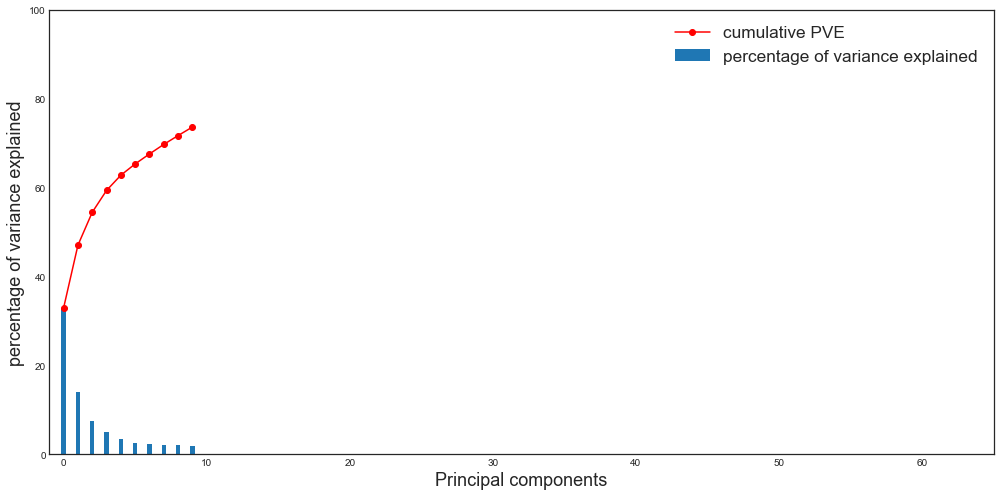

In [63]:
# Percentage of Variance Explained by each PC:
plt.figure(figsize=(14, 7))
plt.ylim(0, 100)
plt.xlim(-1, 65)
plt.bar(range(0, data_PC.explained_variance_ratio_.size), 
        height=data_PC.explained_variance_ratio_ * 100 , width=0.3, align='center', 
        label='percentage of variance explained')
plt.plot(np.cumsum(data_PC.explained_variance_ratio_) * 100, 'ro-', label='cumulative PVE')

plt.ylabel('percentage of variance explained', size=18)
plt.xlabel('Principal components', size=18)
plt.legend(loc='best', fontsize='xx-large')
plt.tight_layout()

In [64]:
print('eigen_value :', data_PC.explained_variance_)
print('explained variance ratio :', data_PC.explained_variance_ratio_)

eigen_value : [20.77222679  8.87615274  4.66449472  3.09756743  2.16108525  1.59408975
  1.41758231  1.35175323  1.25272476  1.20955141]
explained variance ratio : [0.32969996 0.14088366 0.07403557 0.04916506 0.03430108 0.02530164
 0.02250008 0.02145523 0.01988344 0.01919819]


In [70]:
b = sum(data_PC.explained_variance_ratio_)
print (b)

0.7364239133149768


In [71]:
cumsum = np.cumsum(data_PC.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.8) + 1
print('선택할 차원 수 :', d)

선택할 차원 수 : 1


In [72]:
print('singualr_value :', data_PC.singular_values_)
print('singular vector :\n', data_PC.components_.T)

singualr_value : [618.18011643 404.09724328 292.93806394 238.71729724 199.39279174
 171.24972749 161.49074842 157.69655724 151.81033382 149.17143565]
singular vector :
 [[ 7.88475235e-03  1.35582259e-03  5.48830347e-02 -8.88964951e-02
  -4.56118584e-02 -7.18987924e-02 -7.61667015e-02 -1.08513649e-01
  -1.23029932e-01  1.54023635e-01]
 [ 6.41313385e-02  3.05261865e-02 -7.72709006e-02  3.13307973e-02
   3.21037232e-02  9.73486139e-02 -6.95690557e-02  7.86459572e-02
   6.61663407e-02 -1.50933363e-02]
 [-3.29885321e-02  3.37183325e-03  3.37764199e-02 -4.56530460e-03
  -4.91306122e-02 -7.58532231e-02  1.08865254e-01 -4.69690343e-02
  -1.50500852e-01 -1.79045856e-02]
 [ 2.15345581e-01  4.95360130e-02 -4.06787405e-02  2.00247558e-02
  -4.85746203e-03 -1.78061361e-02  2.35096385e-02 -6.30911332e-03
  -9.13872211e-03  4.30650301e-03]
 [ 2.11354134e-01  5.17015919e-02 -3.41331297e-02  3.59622310e-02
  -1.48782735e-02 -4.73189103e-02  3.70733510e-02 -3.66293084e-02
  -2.11834073e-02  2.20002784e-

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_proj = pca.fit_transform(data_standardized)

print('principal component vec :\n', pca.components_.T)

principal component vec :
 [[ 0.00788475  0.00135576  0.05486368 ... -0.13160673  0.06931659
   0.00845588]
 [ 0.06413134  0.03052625 -0.07725637 ... -0.07073948 -0.13553561
   0.05839104]
 [-0.03298853  0.00337179  0.03376973 ... -0.03646556 -0.05664878
   0.01615608]
 ...
 [ 0.04722051 -0.0089405   0.32174969 ... -0.12502787 -0.07624226
   0.01370489]
 [ 0.0509274  -0.02587289  0.31630183 ... -0.12952445 -0.03389734
  -0.03288997]
 [ 0.02851734 -0.0487289   0.16810996 ...  0.33259704  0.125304
  -0.07425345]]


In [74]:
data.shape

(18398, 63)

In [75]:
PCs.shape

(63, 10)

In [35]:
New_data = np.dot(data, PCs)
New_data.shape

(18398, 8)

In [39]:
New_data1 = pd.DataFrame(New_data.T, index=data.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [38]:
New_data1 = New_data1.T

In [39]:
New_data1.head(5)

,상권_코드,서비스_업종_코드_명,평균_영업_개월_수,당월_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,...,총_상주인구_수,청년층_유동인구_수.1,청년층_상주인구_수,중년층_상주인구_수,장년층_상주인구_수,총_직장인구_수,청소년층_직장인구_수,청년층_직장인구_수,중년층_직장인구_수,장년층_직장인구_수
0,1.393146e+09,2.892652e+08,-2.781050e+08,5.717345e+07,2.222126e+07,5.952503e+07,1.175290e+08,6.218153e+07,6.058490e+07,4.588638e+07,...,1.433073e+07,-2.085554e+06,6.656919e+06,-1.587962e+06,-4.219350e+08,1.223086e+06,-1.024376e+09,-1.755605e+08,-3.747227e+08,2.013279e+08
1,7.684302e+08,1.553623e+08,-1.705706e+08,7.062156e+06,2.170303e+07,9.181979e+07,2.076274e+07,6.982294e+07,1.282931e+07,-5.832345e+07,...,-7.448933e+05,-1.318074e+07,1.424923e+07,-3.588418e+05,-2.180162e+08,8.461586e+05,-5.728488e+08,-9.873849e+07,-2.058492e+08,1.130260e+08
2,6.674876e+08,1.425465e+08,-1.089740e+08,1.518634e+07,3.921914e+07,1.515174e+07,9.220995e+07,2.548484e+07,5.724773e+07,8.162677e+07,...,3.188447e+07,1.136108e+06,3.798895e+05,5.571460e+06,-1.457540e+08,7.125861e+05,-4.910078e+08,-8.831022e+07,-1.522519e+08,9.982187e+07
3,4.622443e+08,9.824331e+07,-8.101712e+07,2.961549e+07,7.632294e+06,-1.955420e+07,6.649720e+07,-9.206290e+05,2.399745e+07,6.207969e+07,...,7.732884e+06,1.874479e+06,2.847734e+06,4.339374e+06,-1.167478e+08,6.589975e+05,-3.460876e+08,-6.078107e+07,-1.169404e+08,6.917935e+07
4,3.549250e+08,7.204478e+07,-7.999851e+07,1.594610e+07,1.350319e+06,1.386205e+07,2.078168e+07,1.362236e+07,-6.340794e+06,-1.294250e+07,...,1.042279e+07,8.796532e+06,1.198648e+06,-1.695431e+06,-1.031055e+08,6.337759e+05,-2.656311e+08,-4.961943e+07,-7.023227e+07,5.546968e+07


In [40]:
New_data1['상권_코드'] = data['상권_코드']

In [41]:
New_data1['서비스_업종_코드_명'] = data['서비스_업종_코드_명']

In [42]:
New_data1.head(5)

,상권_코드,서비스_업종_코드_명,평균_영업_개월_수,당월_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,...,총_상주인구_수,청년층_유동인구_수.1,청년층_상주인구_수,중년층_상주인구_수,장년층_상주인구_수,총_직장인구_수,청소년층_직장인구_수,청년층_직장인구_수,중년층_직장인구_수,장년층_직장인구_수
0,1744,8,-2.781050e+08,5.717345e+07,2.222126e+07,5.952503e+07,1.175290e+08,6.218153e+07,6.058490e+07,4.588638e+07,...,1.433073e+07,-2.085554e+06,6.656919e+06,-1.587962e+06,-4.219350e+08,1.223086e+06,-1.024376e+09,-1.755605e+08,-3.747227e+08,2.013279e+08
1,1744,10,-1.705706e+08,7.062156e+06,2.170303e+07,9.181979e+07,2.076274e+07,6.982294e+07,1.282931e+07,-5.832345e+07,...,-7.448933e+05,-1.318074e+07,1.424923e+07,-3.588418e+05,-2.180162e+08,8.461586e+05,-5.728488e+08,-9.873849e+07,-2.058492e+08,1.130260e+08
2,1744,6,-1.089740e+08,1.518634e+07,3.921914e+07,1.515174e+07,9.220995e+07,2.548484e+07,5.724773e+07,8.162677e+07,...,3.188447e+07,1.136108e+06,3.798895e+05,5.571460e+06,-1.457540e+08,7.125861e+05,-4.910078e+08,-8.831022e+07,-1.522519e+08,9.982187e+07
3,1744,3,-8.101712e+07,2.961549e+07,7.632294e+06,-1.955420e+07,6.649720e+07,-9.206290e+05,2.399745e+07,6.207969e+07,...,7.732884e+06,1.874479e+06,2.847734e+06,4.339374e+06,-1.167478e+08,6.589975e+05,-3.460876e+08,-6.078107e+07,-1.169404e+08,6.917935e+07
4,1744,5,-7.999851e+07,1.594610e+07,1.350319e+06,1.386205e+07,2.078168e+07,1.362236e+07,-6.340794e+06,-1.294250e+07,...,1.042279e+07,8.796532e+06,1.198648e+06,-1.695431e+06,-1.031055e+08,6.337759e+05,-2.656311e+08,-4.961943e+07,-7.023227e+07,5.546968e+07


In [44]:
from distutils.version import LooseVersion
from sklearn import __version__ as sklearn_version

if LooseVersion(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split, cross_val_score
else:
    from sklearn.model_selection import train_test_split, cross_val_score

In [48]:
X = New_data1.drop(['서비스_업종_코드_명','과밀_지수_구간_코드','상권_코드'], axis=1)
Y = New_data1['과밀_지수_구간_코드']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(min_samples_split=10, criterion="entropy", n_estimators=50,)

#print ("Training model.")
#train model
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

#print ("FINISHED classifying. accuracy score : ")
print('Accuracy : %.2f' %accuracy_score(Y_test,Y_pred))

ValueError: Unknown label type: 'continuous'

In [50]:
X

,평균_영업_개월_수,당월_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,...,총_상주인구_수,청년층_유동인구_수.1,청년층_상주인구_수,중년층_상주인구_수,장년층_상주인구_수,총_직장인구_수,청소년층_직장인구_수,청년층_직장인구_수,중년층_직장인구_수,장년층_직장인구_수
0,-2.781050e+08,5.717345e+07,2.222126e+07,5.952503e+07,1.175290e+08,6.218153e+07,6.058490e+07,4.588638e+07,5.348640e+07,8.422206e+07,...,1.433073e+07,-2.085554e+06,6.656919e+06,-1.587962e+06,-4.219350e+08,1.223086e+06,-1.024376e+09,-1.755605e+08,-3.747227e+08,2.013279e+08
1,-1.705706e+08,7.062156e+06,2.170303e+07,9.181979e+07,2.076274e+07,6.982294e+07,1.282931e+07,-5.832345e+07,6.113597e+07,-4.927842e+07,...,-7.448933e+05,-1.318074e+07,1.424923e+07,-3.588418e+05,-2.180162e+08,8.461586e+05,-5.728488e+08,-9.873849e+07,-2.058492e+08,1.130260e+08
2,-1.089740e+08,1.518634e+07,3.921914e+07,1.515174e+07,9.220995e+07,2.548484e+07,5.724773e+07,8.162677e+07,2.172922e+07,1.284032e+08,...,3.188447e+07,1.136108e+06,3.798895e+05,5.571460e+06,-1.457540e+08,7.125861e+05,-4.910078e+08,-8.831022e+07,-1.522519e+08,9.982187e+07
3,-8.101712e+07,2.961549e+07,7.632294e+06,-1.955420e+07,6.649720e+07,-9.206290e+05,2.399745e+07,6.207969e+07,9.346820e+04,8.889387e+07,...,7.732884e+06,1.874479e+06,2.847734e+06,4.339374e+06,-1.167478e+08,6.589975e+05,-3.460876e+08,-6.078107e+07,-1.169404e+08,6.917935e+07
4,-7.999851e+07,1.594610e+07,1.350319e+06,1.386205e+07,2.078168e+07,1.362236e+07,-6.340794e+06,-1.294250e+07,1.344515e+07,-3.641192e+06,...,1.042279e+07,8.796532e+06,1.198648e+06,-1.695431e+06,-1.031055e+08,6.337759e+05,-2.656311e+08,-4.961943e+07,-7.023227e+07,5.546968e+07
5,-1.806725e+07,4.532608e+06,1.481779e+06,-5.232133e+05,1.003622e+07,1.085602e+06,1.216386e+06,4.908167e+06,1.387732e+06,9.920910e+06,...,4.598873e+06,1.712531e+06,1.076485e+06,-2.537649e+06,-2.420772e+07,4.879455e+05,-6.924583e+07,-1.314089e+07,-1.694306e+07,1.460771e+07
6,-1.208868e+08,3.717652e+07,1.214997e+07,-1.501210e+07,7.879534e+07,3.609120e+06,1.600812e+07,5.309002e+07,6.238527e+06,8.965001e+07,...,1.535146e+07,-5.980229e+06,-4.829025e+06,2.234075e+06,-1.631993e+08,7.448446e+05,-4.967753e+08,-9.128591e+07,-1.412946e+08,1.025476e+08
7,-1.791697e+08,2.064520e+07,5.595683e+07,3.819943e+07,1.265209e+08,4.874179e+07,7.557813e+07,9.333767e+07,4.221291e+07,1.619189e+08,...,4.359292e+07,-2.011990e+07,-3.616392e+06,-9.556786e+06,-2.214971e+08,8.525967e+05,-7.674374e+08,-1.413287e+08,-2.162686e+08,1.586780e+08
8,-2.455379e+08,6.634357e+07,-2.850806e+06,3.379466e+06,8.525991e+07,1.885419e+07,-2.762486e+07,-1.265994e+07,2.459903e+07,2.533274e+07,...,3.585636e+07,3.403136e+06,2.302472e+05,9.795749e+05,-3.141880e+08,1.023936e+06,-8.789759e+08,-1.629058e+08,-2.408877e+08,1.825739e+08
9,-8.696560e+07,3.148519e+07,-1.674835e+06,-1.732465e+07,4.456211e+07,-3.223287e+06,-7.197618e+06,1.676361e+07,1.049830e+06,3.825005e+07,...,5.081383e+06,1.796518e+05,2.757656e+06,-9.885570e+05,-1.182587e+08,6.617914e+05,-3.344757e+08,-6.295328e+07,-8.532305e+07,7.023162e+07
